<a href="https://colab.research.google.com/github/ecordeiro/cefet/blob/main/Aplicar_Ordena%C3%A7%C3%A3o_Dominancia_distancia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings('ignore')

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
def plot_scatter_with_line_sea(populacao, x_title='X', y_title='Y', title='Scatter Plot with Connected Points', num_fronteira=0,name_chart=''):
    # Extract points from population

    points = [(ind.fitness[0], ind.fitness[1]) for ind in populacao if ind.domination_count == num_fronteira]

    if len(points)>0:

        # Unzip points into separate lists for x and y
        x_values, y_values = zip(*points)

        # Create scatter plot
        sns.scatterplot(x=x_values, y=y_values, label=title)

        # Create line plot
        sns.lineplot(x=x_values, y=y_values, linewidth=2, label='')

        # Add title and labels
        #plt.title(title)
        plt.xlabel(x_title)
        plt.ylabel(y_title)

        # Save the figure
        #plt.savefig(name_chart)
        #plt.close()

    # Display the plot
    plt.show()

# Example usage:
# plot_scatter_with_line_sea(populacao)

In [54]:
class Individual:

    def __init__(self, fit):
        # Inicializa um indivíduo com um cromossomo aleatório
        #self.fitness = None
        self.dominated_solutions = []  # Soluções dominadas por este indivíduo
        self.domination_count = 0  # Contagem de quantos indivíduos dominam este indivíduo
        self.fitness = eval(fit)
        self.crowding_distance = 0

In [55]:
def dominancia(fitness1, fitness2):
    # Verifica se fitness1 domina fitness2
    return all(fitness1[i] <= fitness2[i] for i in range(len(fitness1))) and any(fitness1[i] < fitness2[i] for i in range(len(fitness1)))

def calcula_domininancia_populacao(p):
    # Zera as listas de soluções dominadas e contagens de dominação
    for ind in p:
        ind.dominated_solutions = []

    # Calcula as soluções dominadas e atualiza a contagem de dominação para cada indivíduo
    for i in range(len(p)):
        for j in range(i + 1, len(p)):
            if dominancia(p[i].fitness, p[j].fitness):
                p[j].dominated_solutions.append(i)
                p[i].domination_count += 1
            elif dominancia(p[j].fitness, p[i].fitness):
                p[i].dominated_solutions.append(j)
                p[j].domination_count += 1
    return p

def calcula_crowding_distance(p):
    # Calcula a distância de multidão de cada indivíduo
    for ind in p:
        ind.crowding_distance = 0

    num_objectives = len(p[0].fitness)
    # Calcula a distância de multidão para cada objetivo
    for m in range(num_objectives):
        p.sort(key=lambda x: x.fitness[m])
        p[0].crowding_distance = float('inf')
        p[-1].crowding_distance = float('inf')
        for i in range(1, len(p) - 1):
            p[i].crowding_distance += (p[i + 1].fitness[m] - p[i - 1].fitness[m])
    return p



In [66]:
#df = pd.read_csv(f'/content/drive/MyDrive/Cefet/busca_aleatoria/listas_busca_aleatoria_n10.csv')
df = pd.read_csv(f'/content/drive/MyDrive/Cefet/nsga2/listas_nsga2_n2.csv')

In [67]:
populacao = []
# Iterando sobre as linhas
for index, row in df.iterrows():
    populacao.append(Individual(row['Pontos']))


In [68]:
populacao_total = calcula_domininancia_populacao(populacao)
populacao_total = calcula_crowding_distance(populacao_total)
populacao_total.sort(key=lambda x: (x.domination_count, -x.crowding_distance))

In [69]:
non_dominated_solutions = [ind for ind in populacao_total if ind.domination_count == 0]

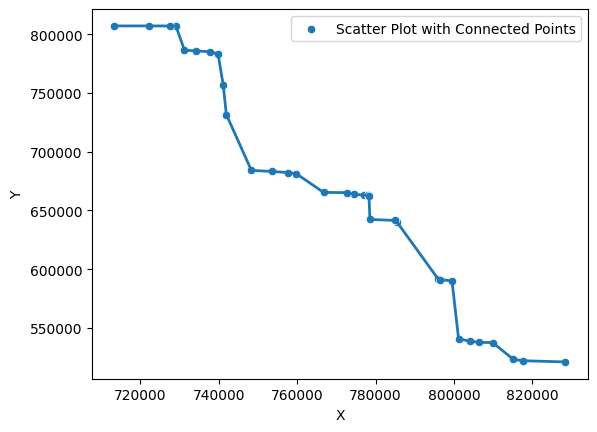

In [70]:
plot_scatter_with_line_sea(populacao_total)